# Graphs
> Graph Data Structure and Algorithms

- title: Graphs
- toc: true
- comments: true
- categories: [tri3]

## Definitions

* **Graph** - A set of vertices connected pairwise by edges.
  * A vertex is a point on a graph where multiple edges meet
  * There has to be a vertice on either end of the edge
* **Loop** - An edge that starts and ends at same vertex

![](https://s3-us-west-2.amazonaws.com/courses-images-archive-read-only/wp-content/uploads/sites/282/2016/01/20155118/Fig2_5_7.png)

* **Path** - A sequence of vertices connected by edges. Two vertices are called **connected** if there is a path between them.
* **Cycle** - A path that starts and ends at the same vertex.

### Types of graphs

- Undirected graphs are graphs whose edges don’t have direction, and can to both ways
- Directed graphs are graphs whose edges have a direction

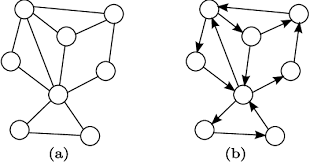

### Graph API

We will explore how to actually model a graph using Java.

#### Bag

First, we must define a Bag class. This is a simple data structure where items can be added and you can iterate through the items. The syntax is not as important as the concept.

In [2]:
// from https://algs4.cs.princeton.edu/13stacks/Bag.java.html

import java.util.Iterator;
import java.util.NoSuchElementException;


public class Bag<Item> implements Iterable<Item> {
    private Node<Item> first;    
    private int n;              

    private static class Node<Item> {
        private Item item;
        private Node<Item> next;
    }

    public Bag() {
        first = null;
        n = 0;
    }

    public boolean isEmpty() {
        return first == null;
    }


    public int size() {
        return n;
    }


    public void add(Item item) {
        Node<Item> oldfirst = first;
        first = new Node<Item>();
        first.item = item;
        first.next = oldfirst;
        n++;
    }



    public Iterator<Item> iterator()  {
        return new LinkedIterator(first);
    }

    private class LinkedIterator implements Iterator<Item> {
        private Node<Item> current;

        public LinkedIterator(Node<Item> first) {
            current = first;
        }

        public boolean hasNext()  {
            return current != null;
        }

        public Item next() {
            if (!hasNext()) throw new NoSuchElementException();
            Item item = current.item;
            current = current.next;
            return item;
        }
    }
}

#### Graph

This is the class containing the necessary properties and methods to implement a graph.

How can you represent a graph using code? Instead of purely trying to visualize it, it's easier to think of what a graph is at its core: a collection of vertices and edges. Furthermore, an edge can be defined by the 2 vertices that it connects.

There are a few ways to represent a graph. We will be using the **adjacency list** representation. First, we create a simple list of length V, where V is the number of vertices in the graph. This list represents all of the vertices in the graph: the index of 0 represents vertex 0, for example. 

How do we account for edges? The way we do this in this representation is that each index of the list of vertices contains a bag of integers. This bag contains all of the vertices that the vertex at that index is connected to. 


![override](https://github.com/AD1616/ADfastpages/assets/64157584/3219c760-cc53-4d60-8555-eae9f8bff2d3)

In [3]:
import java.util.NoSuchElementException;


public class Graph {
    private static final String NEWLINE = System.getProperty("line.separator");
    
    // The total number of vertices
    private final int V;
    // The total number of edges
    private int E;
    // declaring an array of bags
    private Bag<Integer>[] adj;

    // Graph constructor must include number of vertices
    public Graph(int V) {
        if (V < 0) throw new IllegalArgumentException("Number of vertices must be non-negative");
        this.V = V;
        // must add all edges after the vertices are initialized
        this.E = 0;
        // casting is required here. We initialize the array of bags.
        adj = (Bag<Integer>[]) new Bag[V];
        // next, we initialize the bag at each index of the array
        for (int v = 0; v < V; v++) {
            adj[v] = new Bag<Integer>();
        }
    }


    // get # of vertices
    public int V() {
        return V;
    }

    // get # of edges
    public int E() {
        return E;
    }

    // error checking method
    private void validateVertex(int v) {
        if (v < 0 || v >= V)
            throw new IllegalArgumentException("vertex " + v + " is not between 0 and " + (V-1));
    }


    // method to add an edge.
    // To define an edge we need two vertices.
    // To implement it, we need to make sure v and w both know they are connected.
    // Index v of the adjacency list represents vertex v. The bag at this index contains
    // all of the vertices that index v shares an edge with. Therefore, we just have to add
    // vertex w to this bag. We must also do the same for vertex w; meaning, we add v to
    // the bag at vertex w
    public void addEdge(int v, int w) {
        validateVertex(v);
        validateVertex(w);
        E++;
        adj[v].add(w);
        adj[w].add(v);
    }


    public Iterable<Integer> adj(int v) {
        validateVertex(v);
        return adj[v];
    }


    public int degree(int v) {
        validateVertex(v);
        return adj[v].size();
    }


    public String toString() {
        StringBuilder s = new StringBuilder();
        s.append(V + " vertices, " + E + " edges " + NEWLINE);
        for (int v = 0; v < V; v++) {
            s.append(v + ": ");
            for (int w : adj[v]) {
                s.append(w + " ");
            }
            s.append(NEWLINE);
        }
        return s.toString();
    }


    public static void main(String[] args) {
        // Example of how to initialize a graph.
        Graph G = new Graph(7);
        G.addEdge(0, 1);
        G.addEdge(0, 2);
        G.addEdge(0, 6);
        G.addEdge(0, 5);
        G.addEdge(6, 4);
        G.addEdge(4, 3);
        G.addEdge(4, 5);
        G.addEdge(3, 5);
        System.out.println(G);
    }

}
Graph.main(null);

7 vertices, 8 edges 
0: 5 6 2 1 
1: 0 
2: 0 
3: 5 4 
4: 5 3 6 
5: 3 4 0 
6: 4 0 



Note that the output from the above tester method initializes the graph pictured above the class. 

### Depth First Search

One method to search all of the vertices and edges in a connected graph. Start at a random vertex and mark it. Then, go to any vertex connected to the starting vertex and mark it. Continue to do this until you have explored all vertices along this path. Then, retrace back one step, and see if you can explore any other vertices. Continue to do this until you get back to the root. Then do the same thing again. It is called depth first search because you fully explore the entire root of a node first, before moving on.

In [26]:
public class DepthFirstSearch {
    private boolean[] marked;    
    private int count;           

    public DepthFirstSearch(Graph G, int s) {
        marked = new boolean[G.V()];
        validateVertex(s);
        dfs(G, s);
    }

    private void dfs(Graph G, int v) {
        count++;
        marked[v] = true;
        for (int w : G.adj(v)) {
            if (!marked[w]) {
                dfs(G, w);
            }
        }
    }


    public boolean marked(int v) {
        validateVertex(v);
        return marked[v];
    }


    public int count() {
        return count;
    }

    private void validateVertex(int v) {
        int V = marked.length;
        if (v < 0 || v >= V)
            throw new IllegalArgumentException("vertex " + v + " is not between 0 and " + (V-1));
    }

    public static void main(String[] args) {
        Graph G = new Graph(7);
        G.addEdge(0, 1);
        G.addEdge(0, 2);
        G.addEdge(0, 6);
        G.addEdge(0, 5);
        G.addEdge(6, 4);
        G.addEdge(4, 3);
        G.addEdge(4, 5);
        G.addEdge(3, 5);
        int s = 0;
        DepthFirstSearch search = new DepthFirstSearch(G, s);
        for (int v = 0; v < G.V(); v++) {
            if (search.marked(v))
                System.out.print(v + " ");
        }

        System.out.println();
        if (search.count() != G.V()) {
            System.out.println("NOT connected");
        }
        else {
            System.out.println("connected");
        }
    }

}
DepthFirstSearch.main(null);

0 1 2 3 4 5 6 
connected


### Breadth First Search

### Databases using graphs

One popular database that utilizes graphs is called Neo4j. I used this while working at the San Diego Supercomputer Center for various kinds of data that could be represented well using graphs. 

Here's an example of how this could be used in relation to something simple like forming CSA groups:

![override](https://github.com/AD1616/ADfastpages/assets/64157584/2cbbdb8c-79ed-4a63-a184-b410ad8c5d3e)

As you can see, we have a great visualization of nodes and edges(relationships) using this. Also, we can store as many properties as we want within each node and edge. Additionally, we can give nodes and edges labels, which we can then query against using the Cypher query language. The simplest cypher query is pictured, where MATCH(n) RETURN n returns all nodes and edges in the database.